In [1]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data.generated.generated_data import get_noisy_nonlinear_with_non_noisy_labels
import common_grid_search_analysis
import DecisionTrees.common_decision_tree as common_decision_tree
import TrainingCurves

import numpy as np
from sklearn import tree

In [2]:
PLOT_PREFIX = "Figures/NOISY_NONLINEAR_DT_TEST_"
GLOBAL_FIG_COUNTER = 0

GS_FILE_NAME_PREFIX = "Analysis_Data/NOISY_NONLINEAR_DECISION_TREE"

In [3]:
# Load Data
X_train, X_test, y_train, y_test, y_test_non_noisy = get_noisy_nonlinear_with_non_noisy_labels()
num_features = X_train.shape[1]

In [4]:
# Start with Learning Curve on Default Classifier
train_sizes, train_scores, test_scores, fit_times = TrainingCurves.perform_learning_curve(tree.DecisionTreeClassifier(criterion='gini'), X_train, y_train, "accuracy")

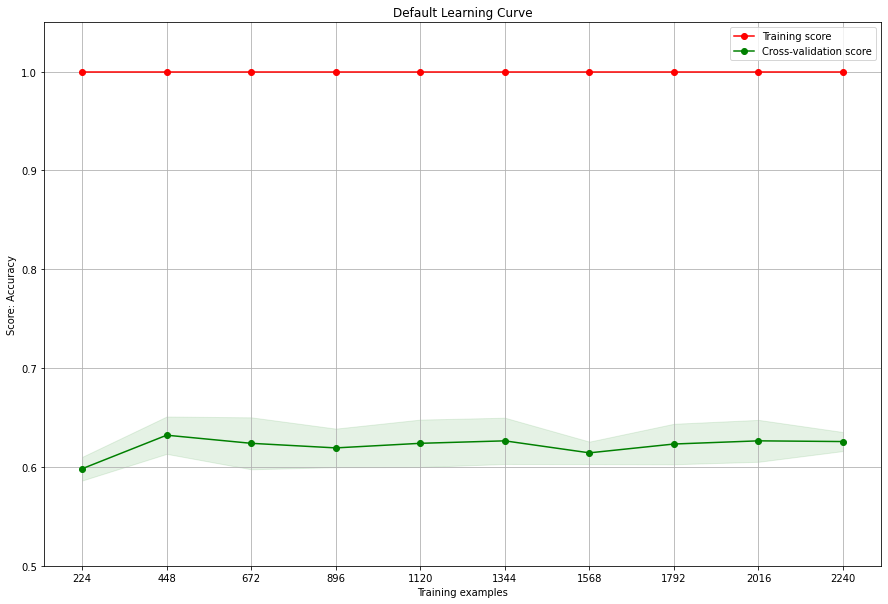

In [5]:
ylim=(0.5, 1.05)
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, "Default Learning Curve", ylim=ylim)

In [6]:
ccp_alpha = np.arange(0.0, 0.005, 0.0001)

criterion = ['gini', 'entropy']
min_samples_split = [i for i in range(2, 200, 5)]
min_samples_leaf = [i for i in range(1, 200, 5)]
max_depth = [i for i in range(1, 50, 2)]
max_features = [i for i in range(num_features+1)]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.9s finished


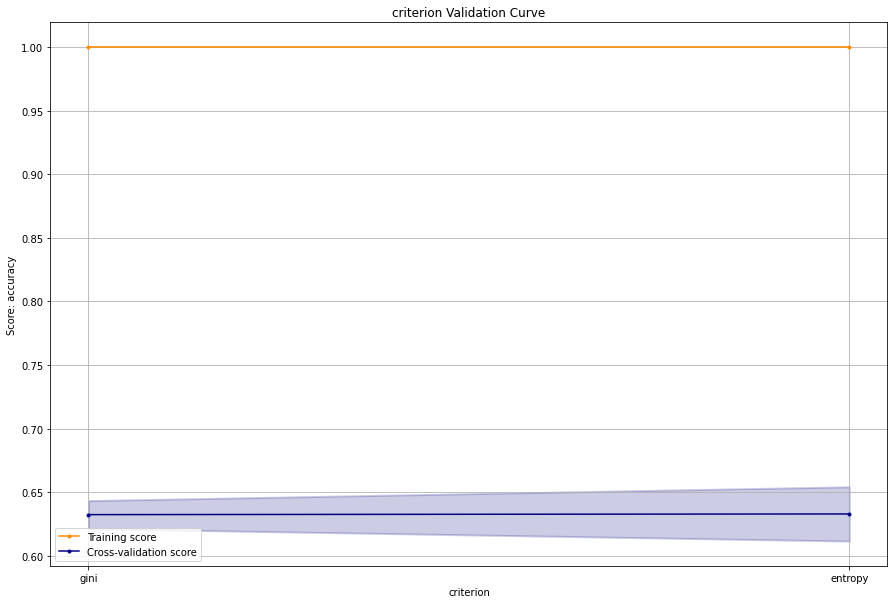

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    0.7s finished


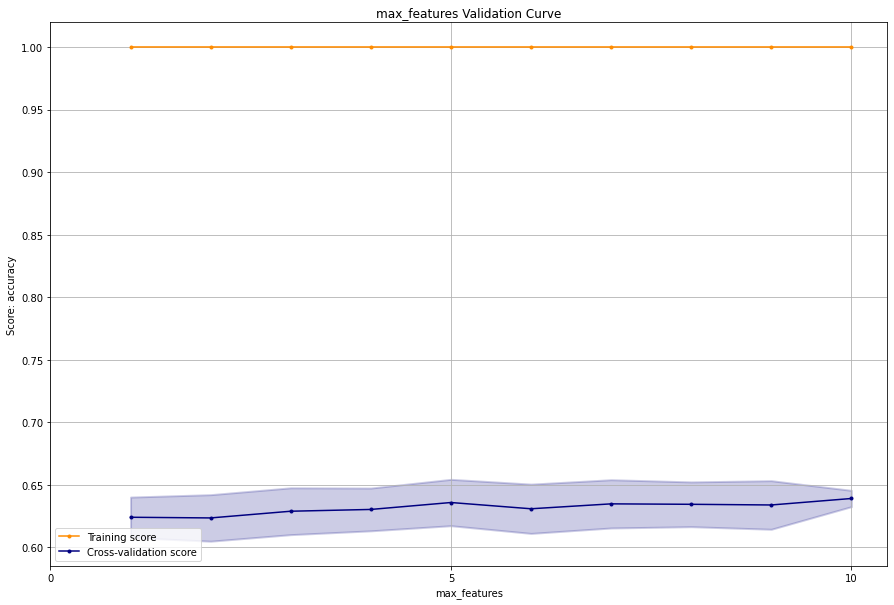

In [7]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(), X_train, y_train, "criterion", criterion, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "criterion", criterion, title="criterion Validation Curve", scoring="accuracy", tick_spacing=1)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(), X_train, y_train, "max_features", max_features, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "max_features", max_features, title="max_features Validation Curve", scoring="accuracy", tick_spacing=5)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    1.8s finished


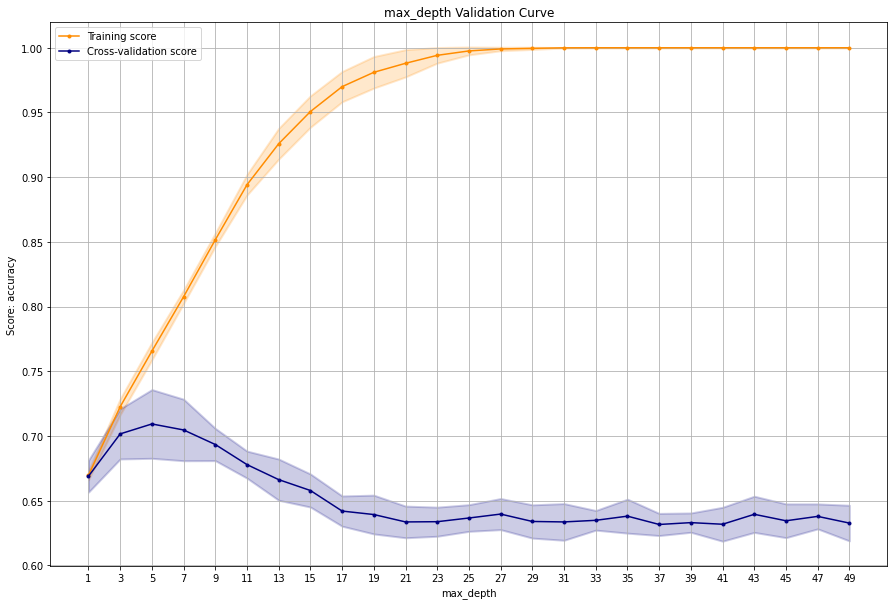

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.3s finished


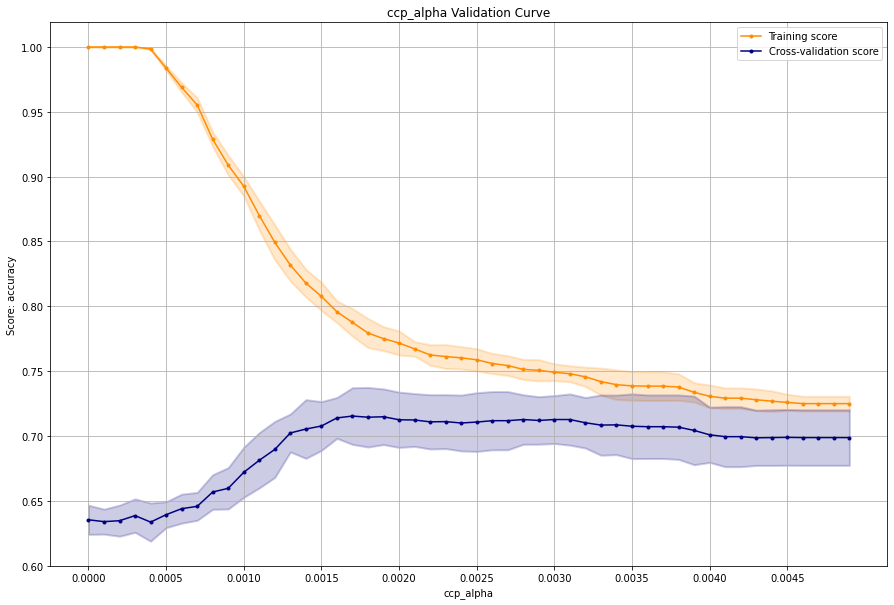

In [8]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(), X_train, y_train, "max_depth", max_depth, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "max_depth", max_depth, title="max_depth Validation Curve", scoring="accuracy", tick_spacing=1)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(), X_train, y_train, "ccp_alpha", ccp_alpha, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "ccp_alpha", ccp_alpha, title="ccp_alpha Validation Curve", scoring="accuracy", tick_spacing=5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.2s finished


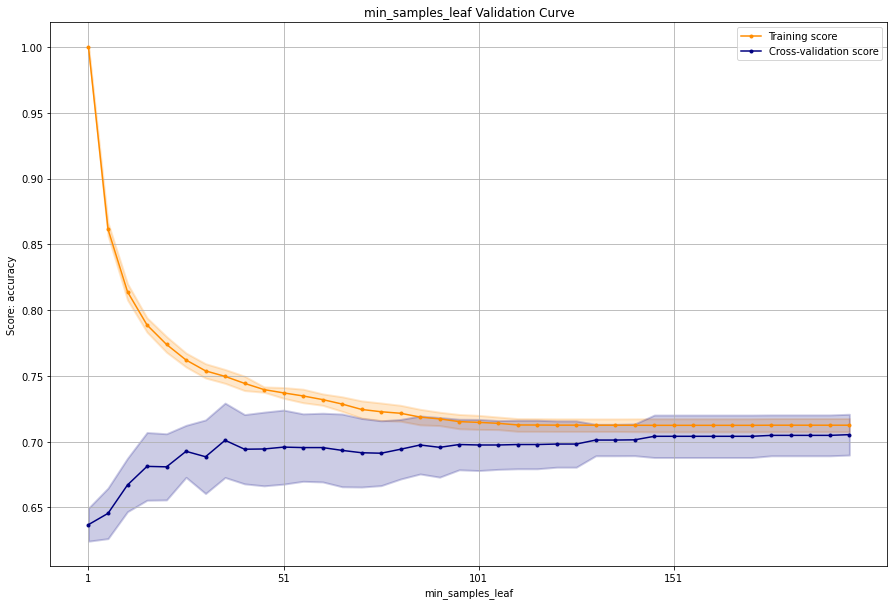

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.8s finished


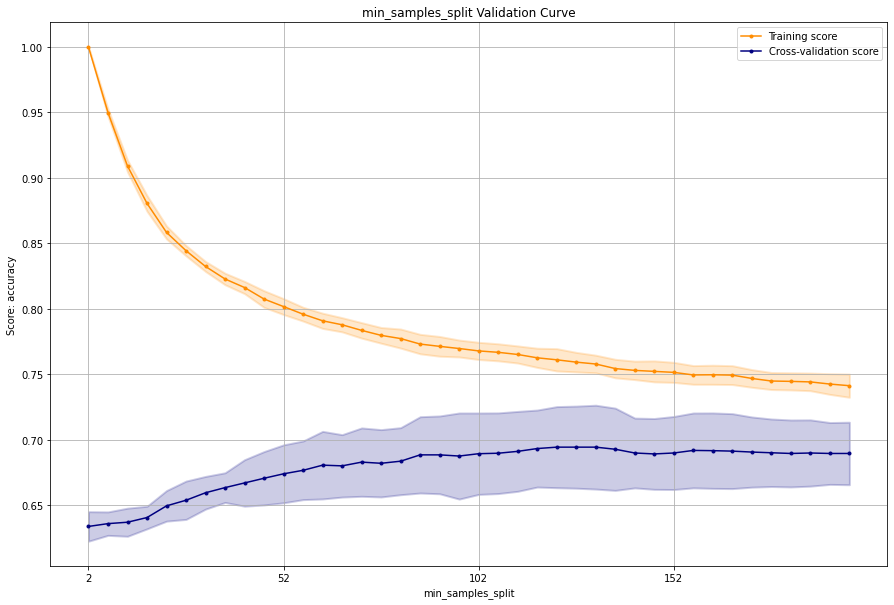

In [9]:
test_parameters={}
# test_parameters = {'criterion': 'gini', 'max_features': num_features//2, 'max_depth': 100, 'ccp_alpha': 0.0001}
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(**test_parameters), X_train, y_train, "min_samples_leaf", min_samples_leaf, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "min_samples_leaf", min_samples_leaf, title="min_samples_leaf Validation Curve", scoring="accuracy", tick_spacing=10)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(**test_parameters), X_train, y_train, "min_samples_split", min_samples_split, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "min_samples_split", min_samples_split, title="min_samples_split Validation Curve", scoring="accuracy", tick_spacing=10)


In [12]:
ccp_alpha = np.arange(0.0, 0.005, 0.0001)

criterion = ['gini', 'entropy']
min_samples_split = [i for i in range(2, 50, 2)]
min_samples_leaf = [i for i in range(1, 50, 2)]
max_depth = [i for i in range(1, 50, 1)]
max_features = [i for i in range(num_features+1)]

parameters = {'criterion': criterion, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'max_features': max_features}

parameters = {'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split, 'ccp_alpha': ccp_alpha}

gs = common_decision_tree.perform_grid_search(parameters, X_train, y_train, scoring='accuracy', GS_FILE_NAME_PREFIX= GS_FILE_NAME_PREFIX)

gs_results = gs

Grid Search Will be Saved to  Analysis_Data/NOISY_NONLINEAR_DECISION_TREE_max_depth_1-49_min_samples_leaf_1-49_min_samples_split_2-48_ccp_alpha_0.0-0.0049.pickle
Fitting 5 folds for each of 1470000 candidates, totalling 7350000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0305s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1272s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1115s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1289s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1220s.) Setting batch_size=32.
[Parallel(n_jobs=-1)]: Done 320 tasks      | elapsed:    0.7s
[Parallel(n

[Parallel(n_jobs=-1)]: Done 255504 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 259568 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 263696 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 267824 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 272016 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 276208 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 280464 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 284720 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 289040 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 293360 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 297744 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 302128 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 306576 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 311024 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 315536 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Do

[Parallel(n_jobs=-1)]: Done 1029680 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 1037840 tasks      | elapsed: 44.7min
[Parallel(n_jobs=-1)]: Done 1046000 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 1054224 tasks      | elapsed: 45.3min
[Parallel(n_jobs=-1)]: Done 1062448 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-1)]: Done 1070736 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 1079024 tasks      | elapsed: 46.4min
[Parallel(n_jobs=-1)]: Done 1087376 tasks      | elapsed: 46.8min
[Parallel(n_jobs=-1)]: Done 1095728 tasks      | elapsed: 47.2min
[Parallel(n_jobs=-1)]: Done 1104144 tasks      | elapsed: 47.6min
[Parallel(n_jobs=-1)]: Done 1112560 tasks      | elapsed: 48.0min
[Parallel(n_jobs=-1)]: Done 1121040 tasks      | elapsed: 48.4min
[Parallel(n_jobs=-1)]: Done 1129520 tasks      | elapsed: 48.8min
[Parallel(n_jobs=-1)]: Done 1138064 tasks      | elapsed: 49.2min
[Parallel(n_jobs=-1)]: Done 1146608 tasks      | elapsed: 49.6min
[Parallel(

[Parallel(n_jobs=-1)]: Done 2203670 tasks      | elapsed: 95.4min
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1971s.) Setting batch_size=12.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1416s.) Setting batch_size=24.
[Parallel(n_jobs=-1)]: Done 2208080 tasks      | elapsed: 95.5min
[Parallel(n_jobs=-1)]: Done 2217176 tasks      | elapsed: 95.7min
[Parallel(n_jobs=-1)]: Done 2226272 tasks      | elapsed: 96.1min
[Parallel(n_jobs=-1)]: Done 2235416 tasks      | elapsed: 96.5min
[Parallel(n_jobs=-1)]: Done 2244560 tasks      | elapsed: 96.9min
[Parallel(n_jobs=-1)]: Done 2253752 tasks      | elapsed: 97.3min
[Parallel(n_jobs=-1)]: Done 2262944 tasks      | elapsed: 97.7min
[Parallel(n_jobs=-1)]: Done 2272184 tasks      | elapsed: 98.2min
[Parallel(n_jobs=-1)]: Done 2281424 tasks      | elapsed: 98.6min
[Parallel(n_jobs=-1)]: Done 2290712 tasks      | elapsed: 99.0min
[Parallel(n_jobs=-1)]: Done 2300000 tasks      | elapsed: 99.5min
[Parallel(n_jobs=-1)]: Done 2309336 task

[Parallel(n_jobs=-1)]: Done 3457592 tasks      | elapsed: 149.8min
[Parallel(n_jobs=-1)]: Done 3469520 tasks      | elapsed: 150.4min
[Parallel(n_jobs=-1)]: Done 3481496 tasks      | elapsed: 151.0min
[Parallel(n_jobs=-1)]: Done 3493472 tasks      | elapsed: 151.5min
[Parallel(n_jobs=-1)]: Done 3505496 tasks      | elapsed: 152.1min
[Parallel(n_jobs=-1)]: Done 3517520 tasks      | elapsed: 152.7min
[Parallel(n_jobs=-1)]: Done 3529592 tasks      | elapsed: 153.2min
[Parallel(n_jobs=-1)]: Done 3541664 tasks      | elapsed: 153.5min
[Parallel(n_jobs=-1)]: Done 3553784 tasks      | elapsed: 153.9min
[Parallel(n_jobs=-1)]: Done 3565904 tasks      | elapsed: 154.5min
[Parallel(n_jobs=-1)]: Done 3578072 tasks      | elapsed: 155.0min
[Parallel(n_jobs=-1)]: Done 3590240 tasks      | elapsed: 155.6min
[Parallel(n_jobs=-1)]: Done 3602456 tasks      | elapsed: 156.2min
[Parallel(n_jobs=-1)]: Done 3614672 tasks      | elapsed: 156.7min
[Parallel(n_jobs=-1)]: Done 3626936 tasks      | elapsed: 157.

[Parallel(n_jobs=-1)]: Done 4730664 tasks      | elapsed: 205.5min
[Parallel(n_jobs=-1)]: Done 4745328 tasks      | elapsed: 206.2min
[Parallel(n_jobs=-1)]: Done 4760040 tasks      | elapsed: 206.8min
[Parallel(n_jobs=-1)]: Done 4774752 tasks      | elapsed: 207.5min
[Parallel(n_jobs=-1)]: Done 4789512 tasks      | elapsed: 208.2min
[Parallel(n_jobs=-1)]: Done 4804272 tasks      | elapsed: 208.9min
[Parallel(n_jobs=-1)]: Done 4819080 tasks      | elapsed: 209.6min
[Parallel(n_jobs=-1)]: Done 4833888 tasks      | elapsed: 210.3min
[Parallel(n_jobs=-1)]: Done 4848744 tasks      | elapsed: 211.0min
[Parallel(n_jobs=-1)]: Done 4863600 tasks      | elapsed: 211.4min
[Parallel(n_jobs=-1)]: Done 4878504 tasks      | elapsed: 211.9min
[Parallel(n_jobs=-1)]: Done 4893408 tasks      | elapsed: 212.6min
[Parallel(n_jobs=-1)]: Done 4908360 tasks      | elapsed: 213.3min
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0490s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Batch computation too f

[Parallel(n_jobs=-1)]: Batch computation too fast (0.1879s.) Setting batch_size=32.
[Parallel(n_jobs=-1)]: Done 6180736 tasks      | elapsed: 269.7min
[Parallel(n_jobs=-1)]: Done 6203872 tasks      | elapsed: 270.6min
[Parallel(n_jobs=-1)]: Done 6227008 tasks      | elapsed: 271.7min
[Parallel(n_jobs=-1)]: Done 6250208 tasks      | elapsed: 272.8min
[Parallel(n_jobs=-1)]: Done 6273408 tasks      | elapsed: 273.9min
[Parallel(n_jobs=-1)]: Done 6296672 tasks      | elapsed: 275.1min
[Parallel(n_jobs=-1)]: Done 6319936 tasks      | elapsed: 276.2min
[Parallel(n_jobs=-1)]: Done 6343264 tasks      | elapsed: 276.9min
[Parallel(n_jobs=-1)]: Done 6366592 tasks      | elapsed: 277.9min
[Parallel(n_jobs=-1)]: Done 6389984 tasks      | elapsed: 279.0min
[Parallel(n_jobs=-1)]: Done 6413376 tasks      | elapsed: 280.2min
[Parallel(n_jobs=-1)]: Done 6436832 tasks      | elapsed: 281.3min
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0285s.) Setting batch_size=6.
[Parallel(n_jobs=-1)]: Done 6

Saved  Analysis_Data/NOISY_NONLINEAR_DECISION_TREE_max_depth_1-49_min_samples_leaf_1-49_min_samples_split_2-48_ccp_alpha_0.0-0.0049.pickle


Plot saved as:  Figures/NOISY_NONLINEAR_DT_TEST_GS_ModelComplexity_ccp_alpha_max_depth_min_samples_leaf_min_samples_split.png


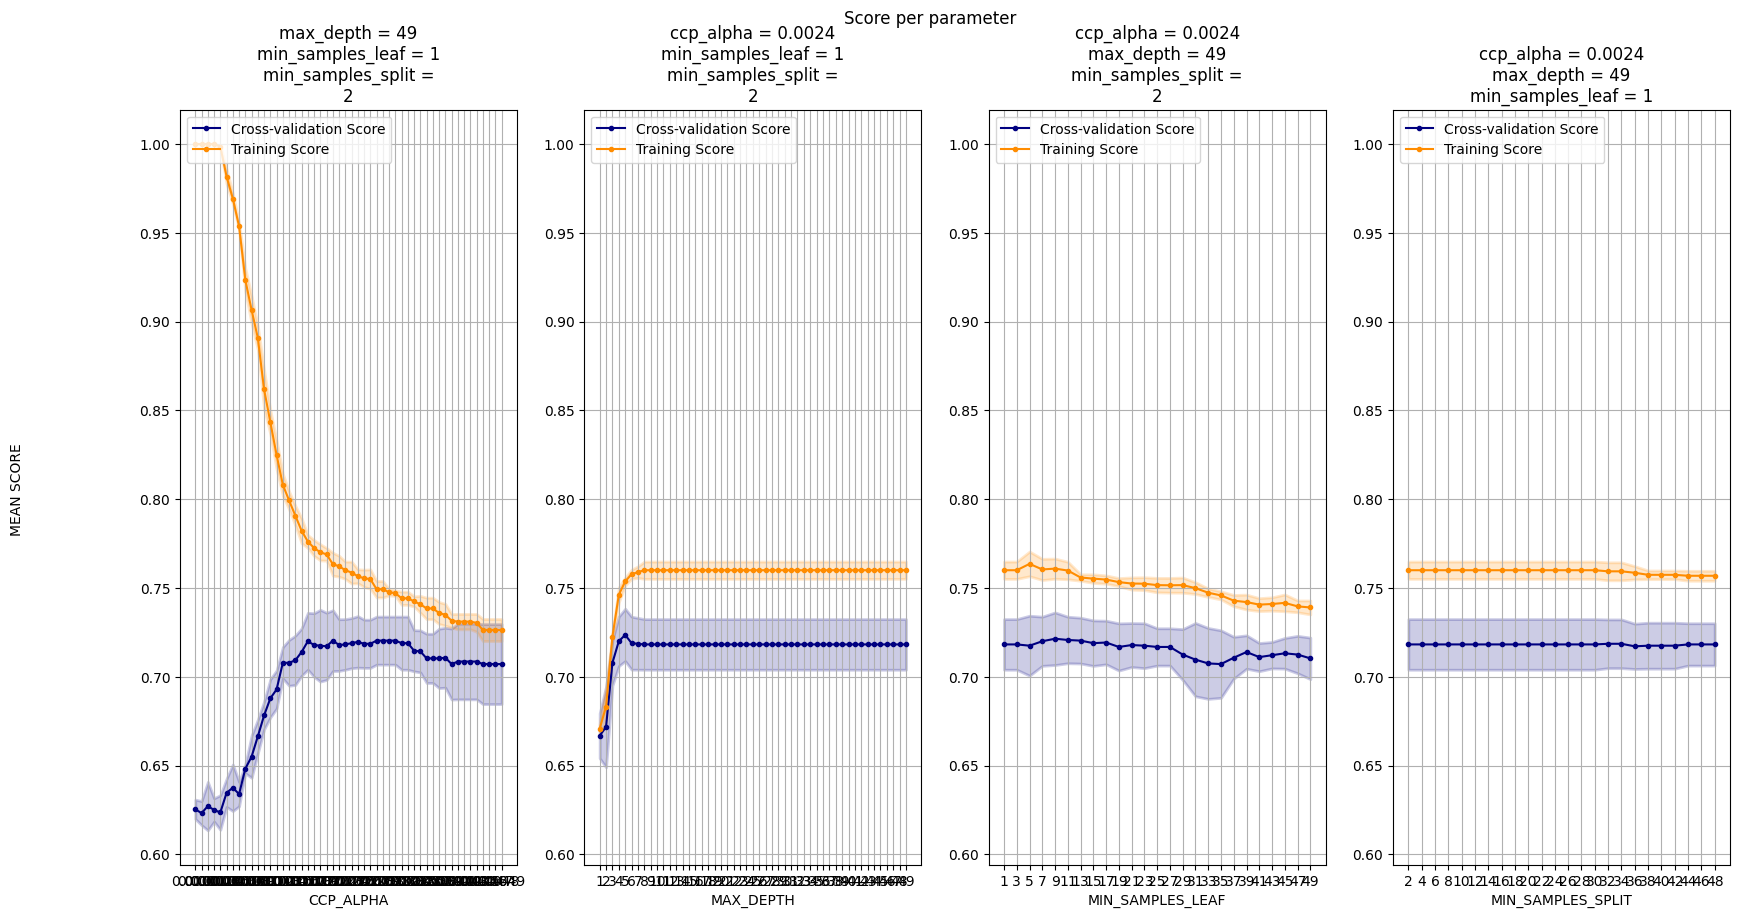

In [17]:
unused_params_values = {'min_samples_leaf': min(min_samples_leaf), 'min_samples_split': min(min_samples_split), 'max_features': max(max_features), 'max_depth': max(max_depth)}

common_grid_search_analysis.plot_grid_search_model_complexity(gs_results, PLOT_PREFIX, unused_params_value_dict=unused_params_values)


Plot saved as:  Figures/NOISY_NONLINEAR_DT_TEST_GS_Times_ccp_alpha_max_depth_min_samples_leaf_min_samples_split.png


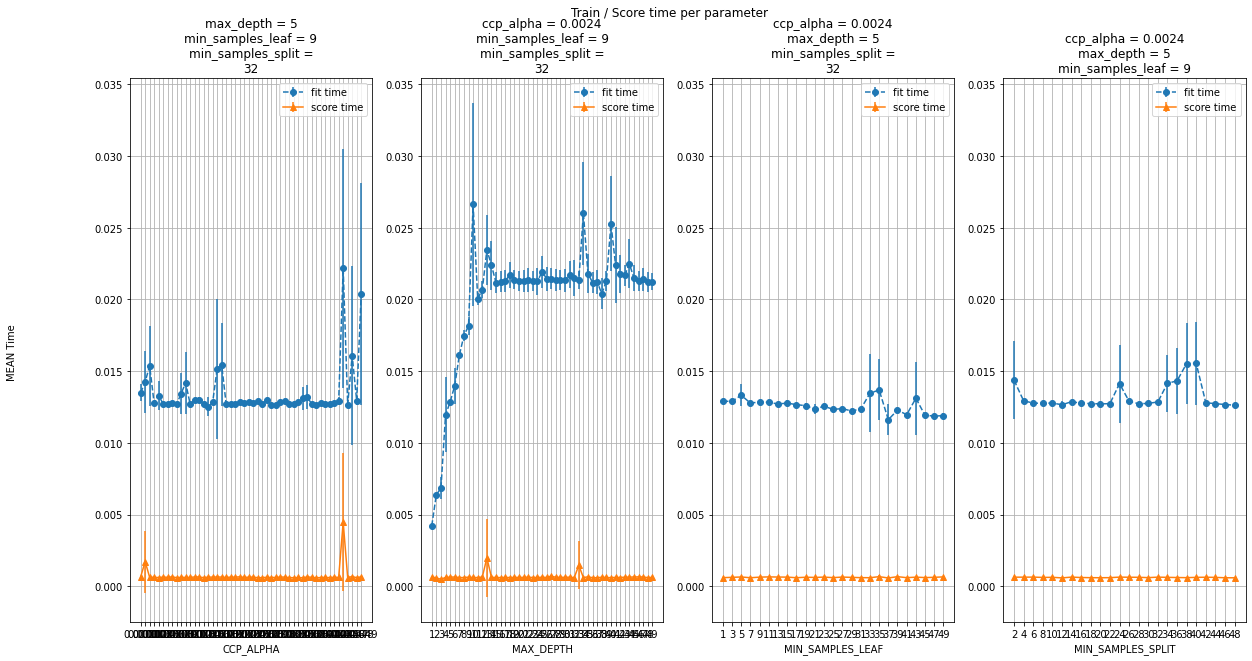

In [14]:
common_grid_search_analysis.plot_grid_search_training_times(gs_results, PLOT_PREFIX)

No handles with labels found to put in legend.


Plot saved as:  Figures/NOISY_NONLINEAR_DT_TEST_GridScore_ccp_alpha_min_samples_leaf_0.png


No handles with labels found to put in legend.


Plot saved as:  Figures/NOISY_NONLINEAR_DT_TEST_GridScore_ccp_alpha_min_samples_split_1.png


No handles with labels found to put in legend.


Plot saved as:  Figures/NOISY_NONLINEAR_DT_TEST_GridScore_min_samples_split_min_samples_leaf_2.png


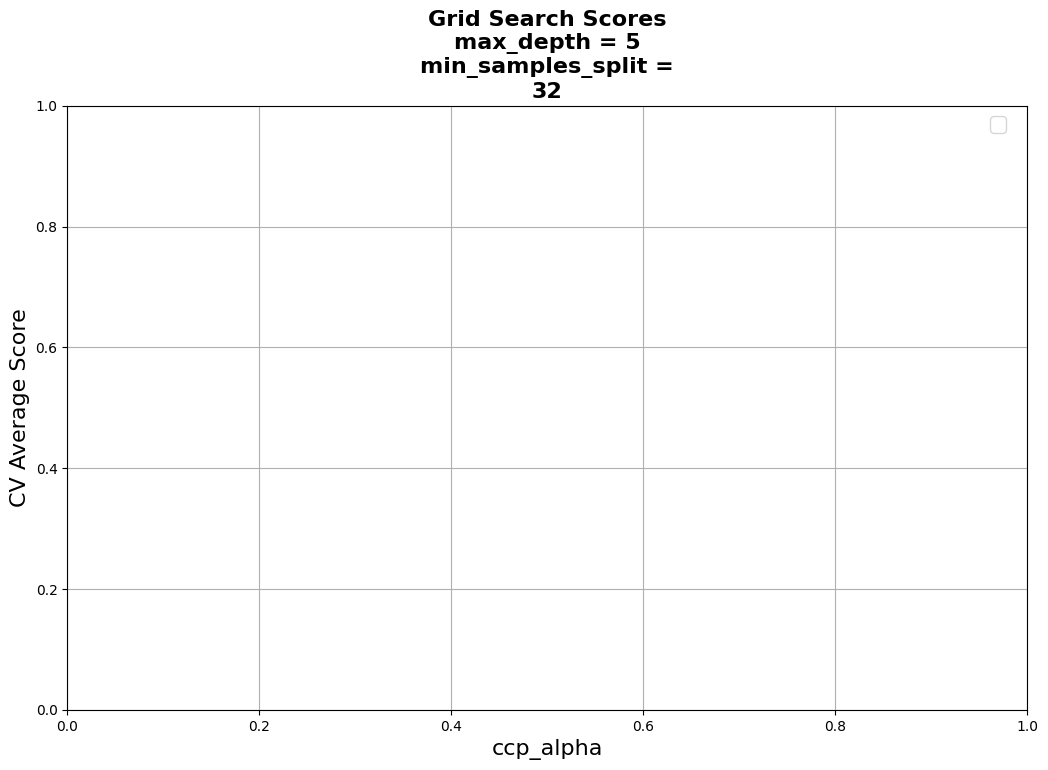

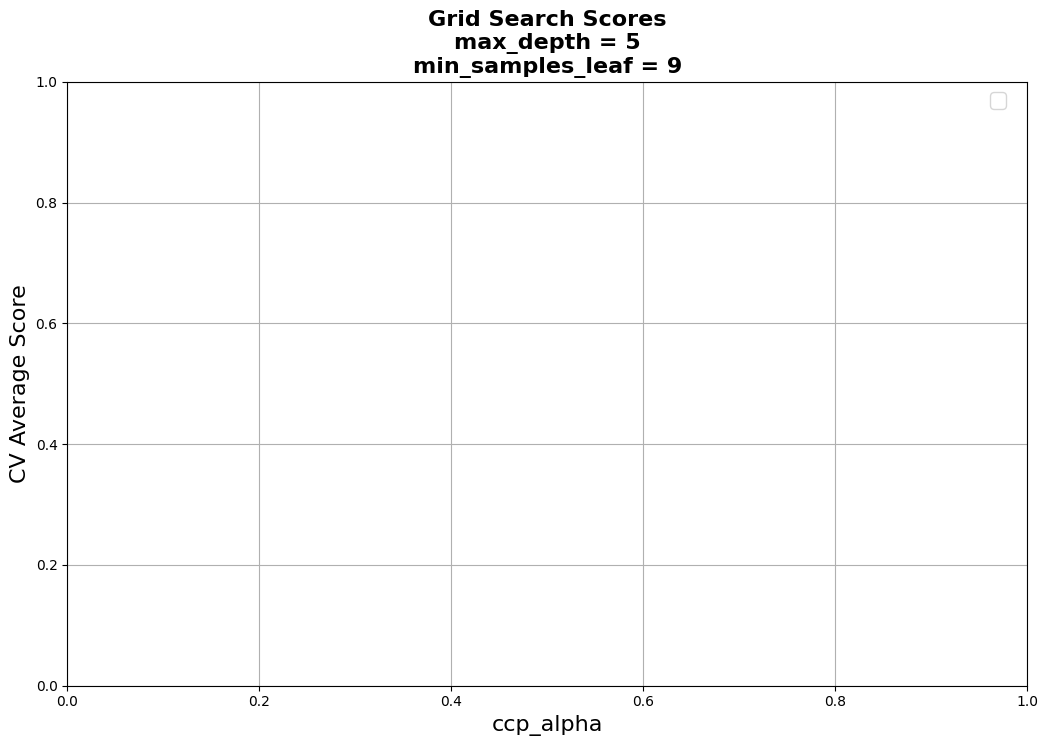

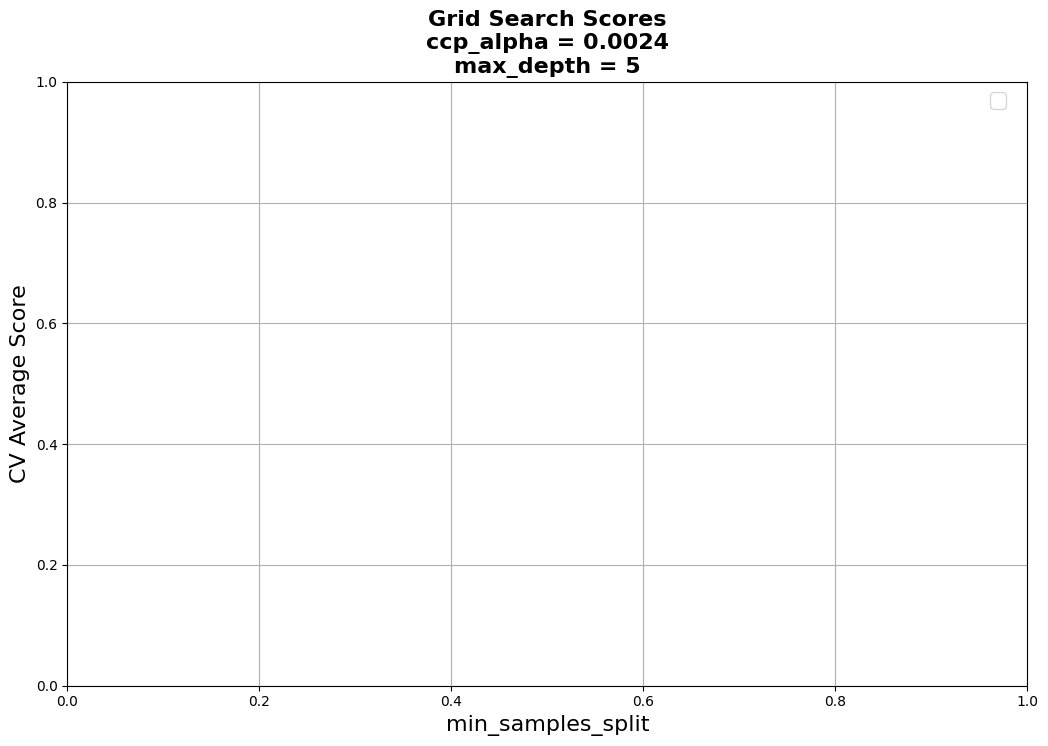

In [15]:
mean_score_limit=0.84
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'ccp_alpha', 'min_samples_leaf', mean_score_limit, PLOT_PREFIX=PLOT_PREFIX, plot_counter=GLOBAL_FIG_COUNTER)
GLOBAL_FIG_COUNTER+=1

common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'ccp_alpha', 'min_samples_split', mean_score_limit, PLOT_PREFIX=PLOT_PREFIX, plot_counter=GLOBAL_FIG_COUNTER)
GLOBAL_FIG_COUNTER+=1
# unused_params_value_dict={'ccp_alpha': 0.0002, 'max_depth': }
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'min_samples_split', 'min_samples_leaf', mean_score_limit, PLOT_PREFIX=PLOT_PREFIX, plot_counter=GLOBAL_FIG_COUNTER)

No handles with labels found to put in legend.


Plot saved as:  Figures/NOISY_NONLINEAR_DT_TEST_GridScore_ccp_alpha_max_depth_2.png


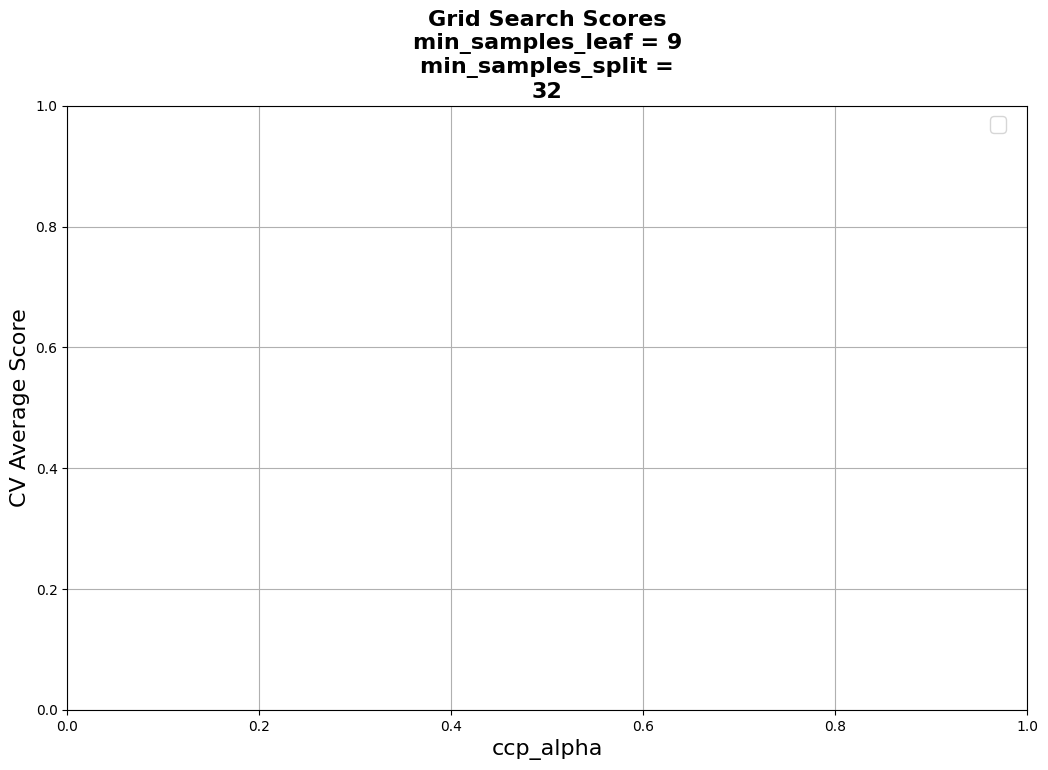

In [16]:
mean_score_limit=0.84
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'ccp_alpha', 'max_depth', mean_score_limit, PLOT_PREFIX=PLOT_PREFIX, plot_counter=GLOBAL_FIG_COUNTER)
GLOBAL_FIG_COUNTER+=1

In [10]:
clf = tree.DecisionTreeClassifier(ccp_alpha=0.002)
clf.fit(X_train, y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))



0.7564285714285715
0.7642857142857142


In [11]:
clf.score(X_test, y_test_non_noisy)

0.8928571428571429